In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/majickdave/dji_vol/master/dji.csv', header=1, index_col=0, usecols=[0,1,2,3,4])

df.head()

Date  Dow Jones  value  RIS Forecast Volume  RIS Actual Volume
NaN  1/4/2016          17148.94                 6547               6886
NaN  1/5/2016          17158.66                 4328               4928
NaN  1/6/2016          16906.51                 3987               3713
NaN  1/7/2016          16514.10                 4006               3910
NaN  1/8/2016          16346.45                 4107               3797

In [38]:
df.index = pd.to_datetime(df['Date'])

In [39]:
df = df.drop('Date', 1)
df.columns = ['DJI', 'forecast', 'actual']
df.head()

DJI  forecast  actual
Date                                  
2016-01-04  17148.94      6547    6886
2016-01-05  17158.66      4328    4928
2016-01-06  16906.51      3987    3713
2016-01-07  16514.10      4006    3910
2016-01-08  16346.45      4107    3797

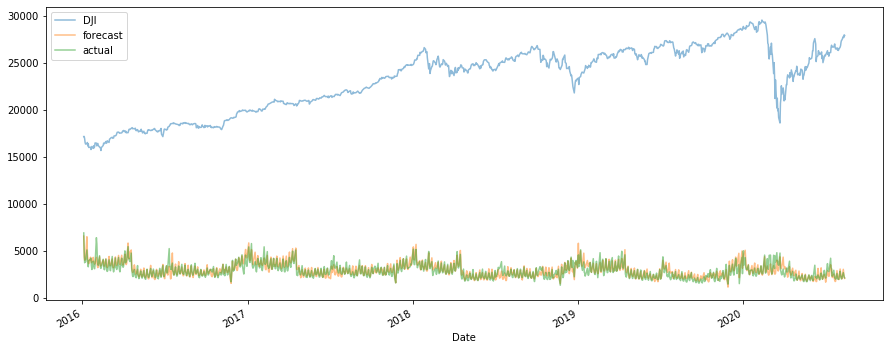

In [40]:
_ = df.plot(figsize = (15,6), alpha=.5)

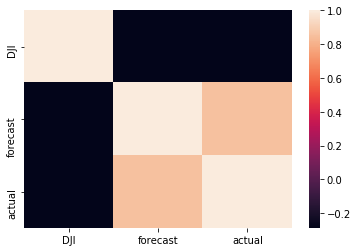

In [41]:
import seaborn as sns

_ = sns.heatmap(df.corr())

There is a weak negative correlation between DJI and actual and forecast volume (when dji goes down, volume tends to increase), while there is a strong positive correlation between actual and forecast volume (when actual volume increases, forecast volume tends to increase per the forecasting model)

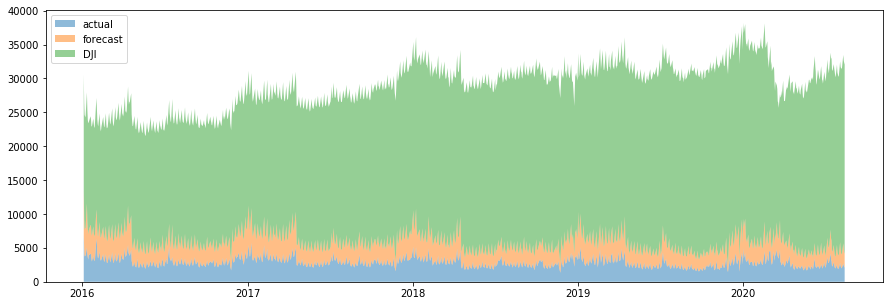

In [42]:
plt.figure(figsize=(15,5))
plt.stackplot(df.index, df['actual'], df['forecast'], df['DJI'], baseline='zero',
              labels= ['actual', 'forecast','DJI'], alpha=.5)
plt.legend(loc='upper left')
plt.show()

In [43]:
pc = df.pct_change()

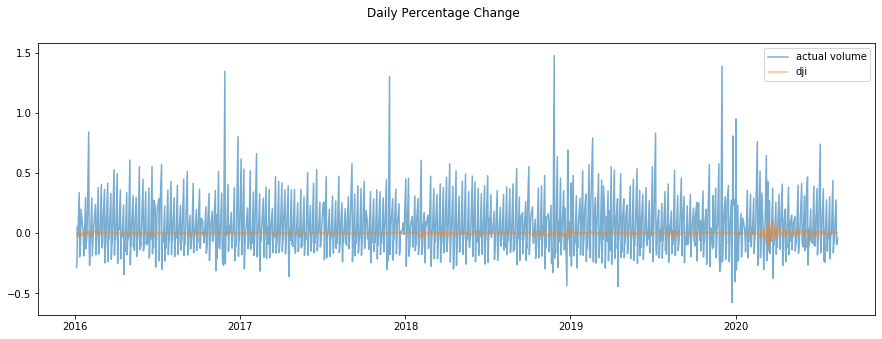

In [44]:
plt.figure(figsize=(15,5))
plt.plot(pc['actual'], alpha=.6)
plt.plot(pc['DJI'], alpha=.5)
# plt.plot(pc['forecast'], alpha=.6)
plt.legend(['actual volume', 'dji'])
plt.suptitle('Daily Percentage Change')
plt.show()

In [45]:
df['diff'] = df['actual'] - df['forecast']

In [46]:
df['diff'].describe()

count    1160.000000
mean      -67.791379
std       399.323906
min     -1399.000000
25%      -296.250000
50%       -96.000000
75%       137.250000
max      2094.000000
Name: diff, dtype: float64

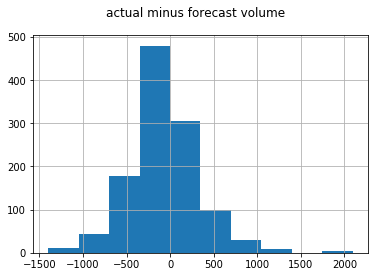

In [47]:
_ = df['diff'].hist()
plt.suptitle('actual minus forecast volume')
plt.show()

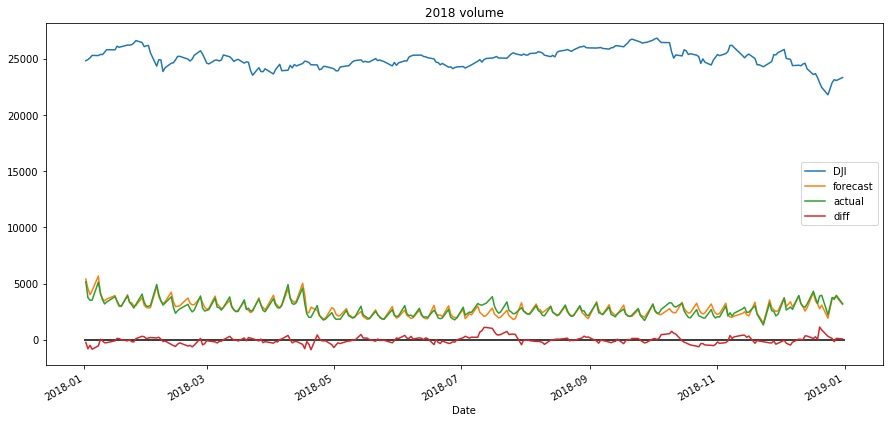

In [48]:
df[(df.index<'2019') & (df.index > '2018')].plot(figsize= (15,7))
plt.hlines(xmin='2018', xmax='2019', y=0)
plt.title('2018 volume')
plt.show()

Text(0.5, 1.0, '2016 Q1 volume')

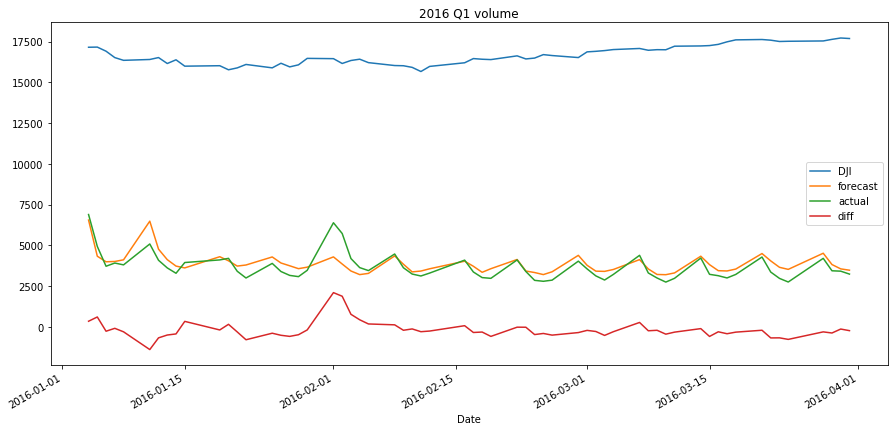

In [49]:
df[(df.index.quarter==1) & (df.index.year==2016)].plot(figsize= (15,7))
plt.title('2016 Q1 volume')

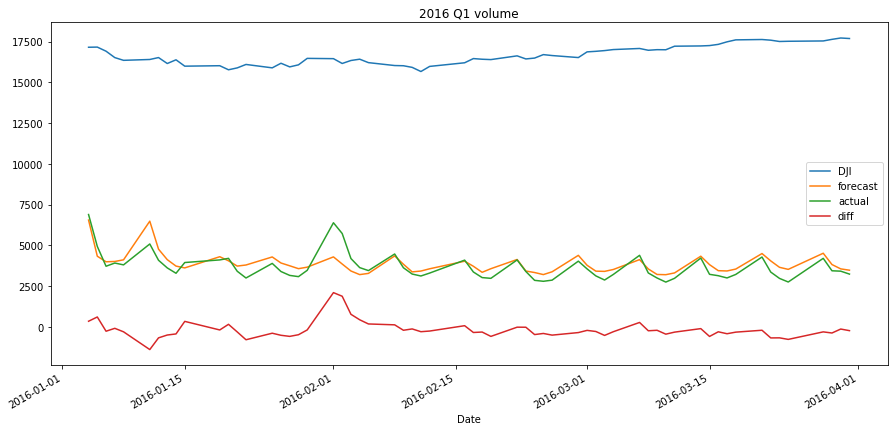

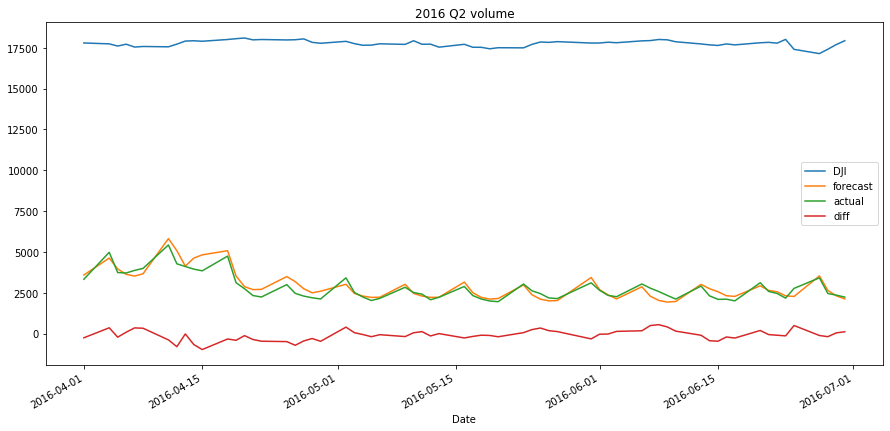

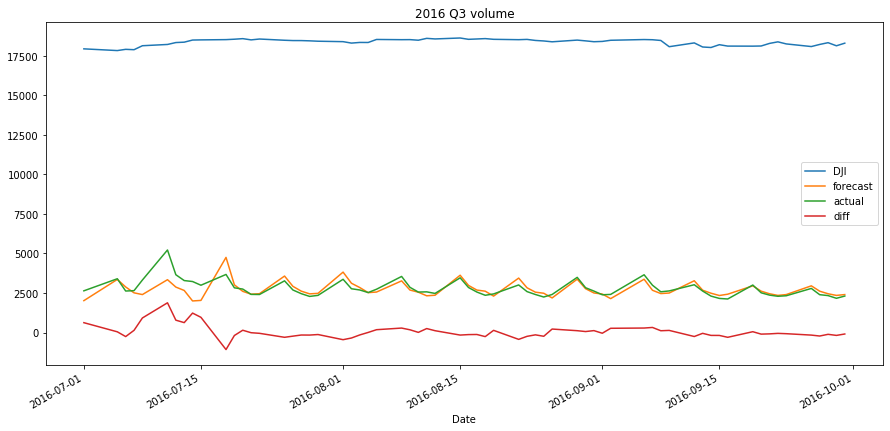

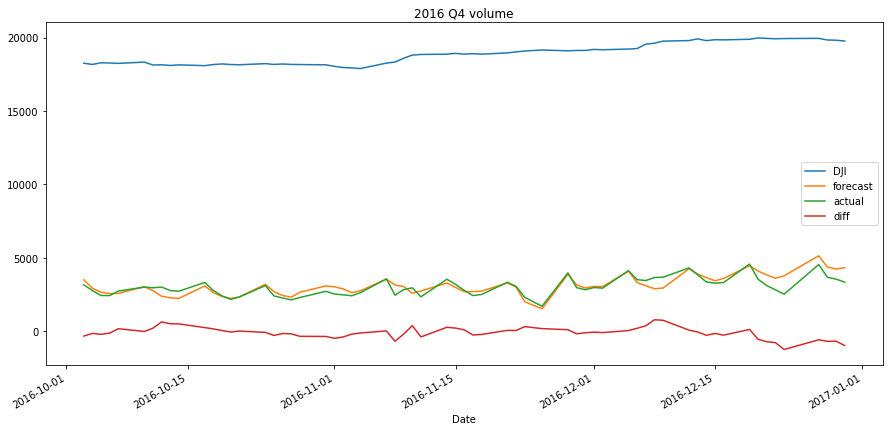

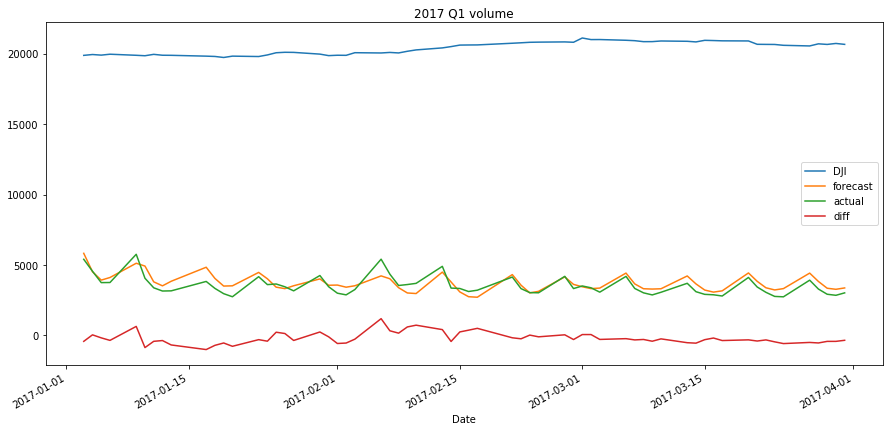

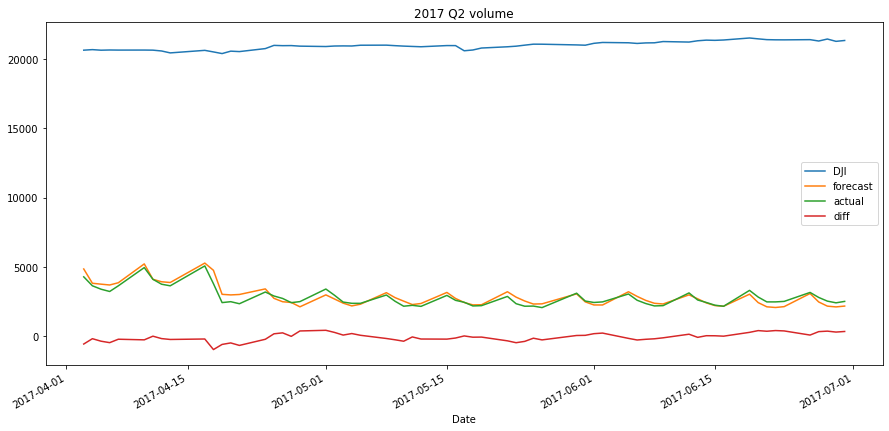

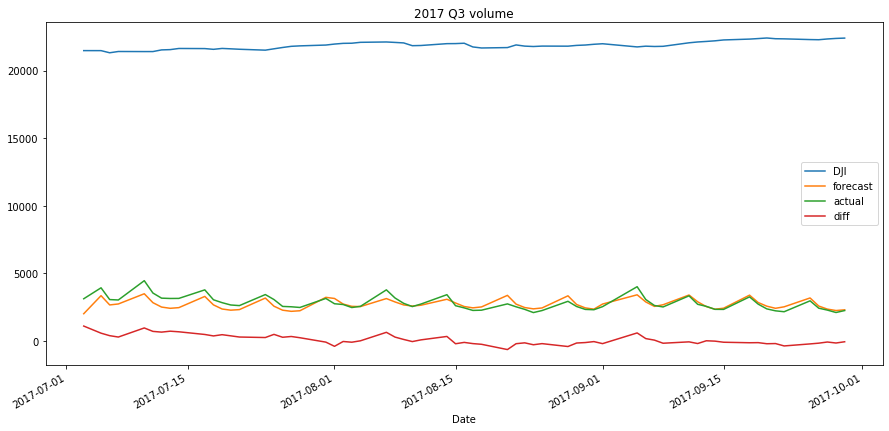

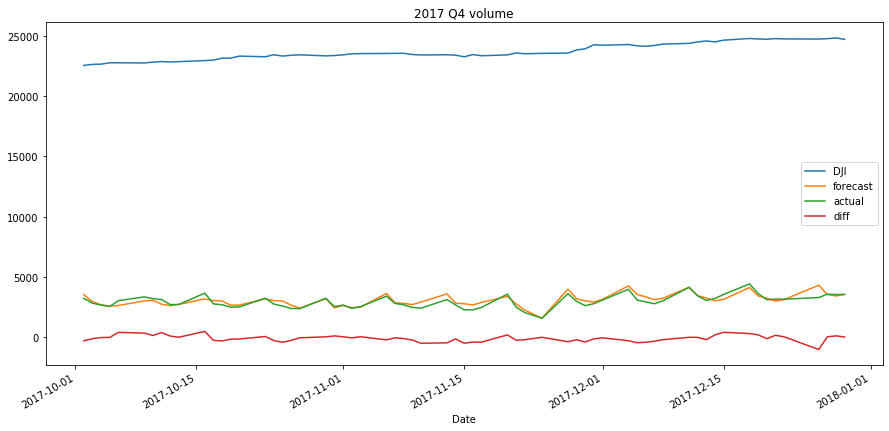

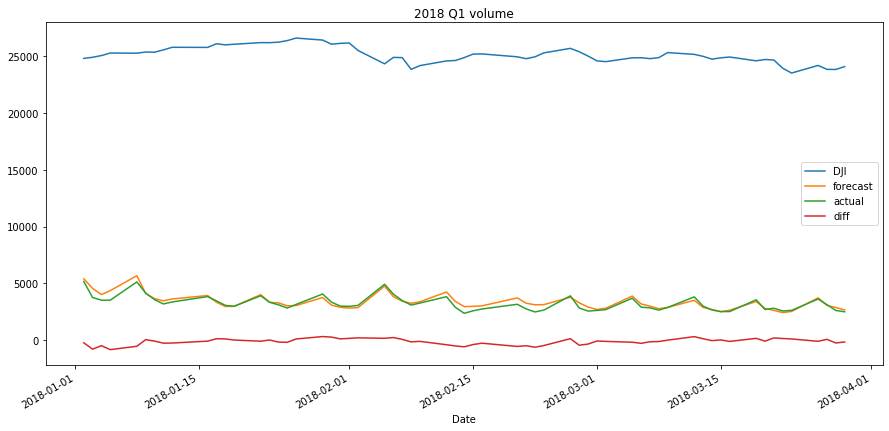

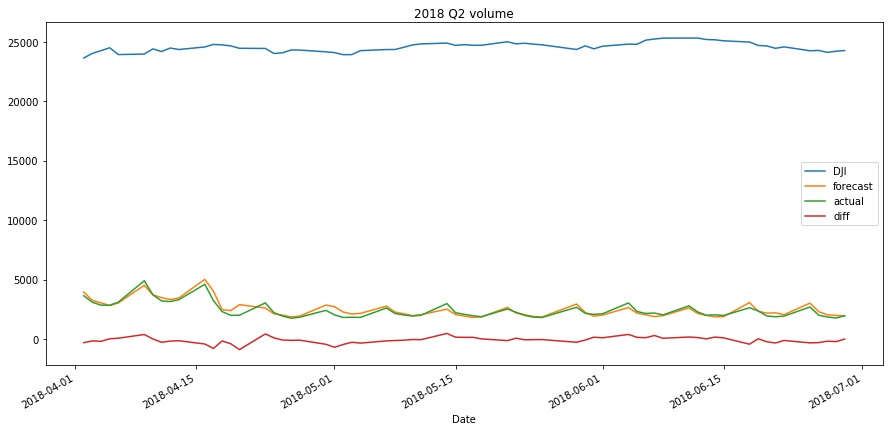

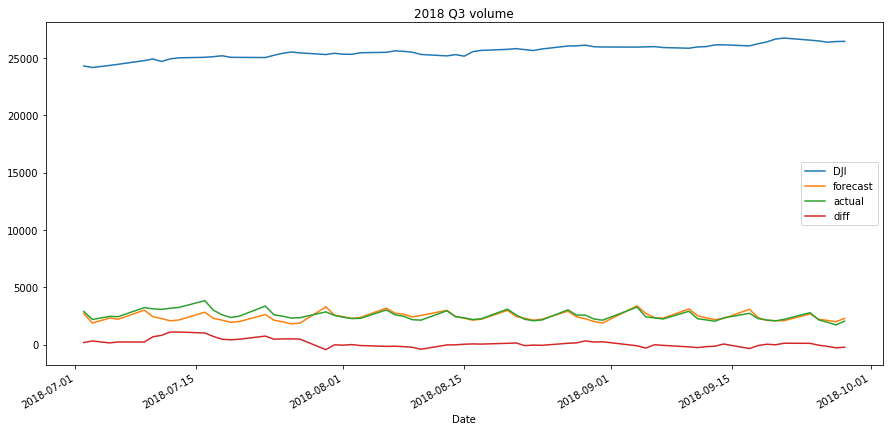

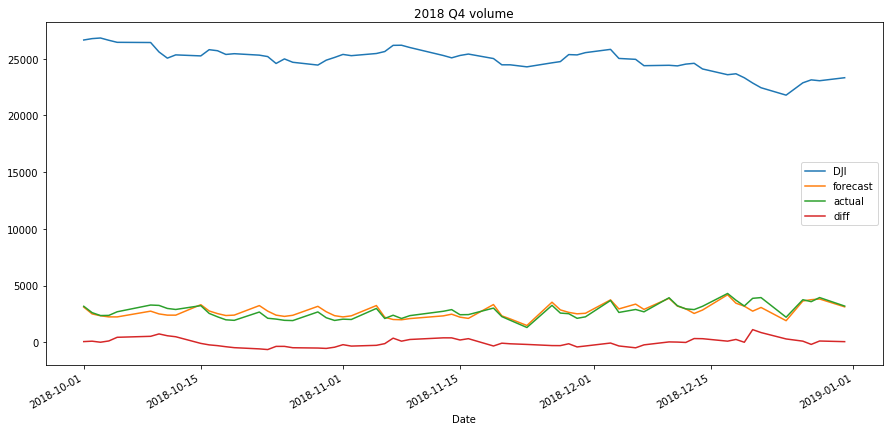

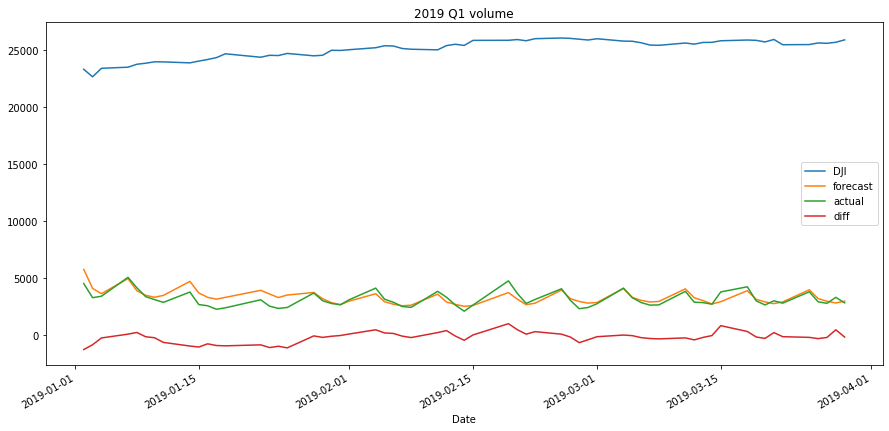

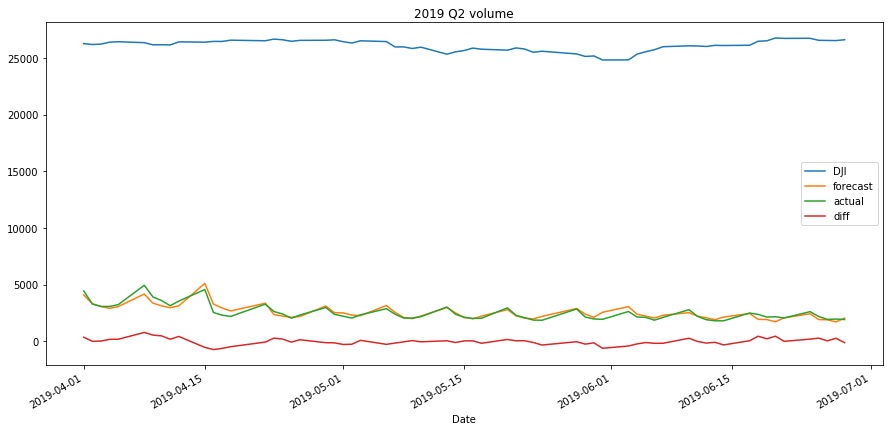

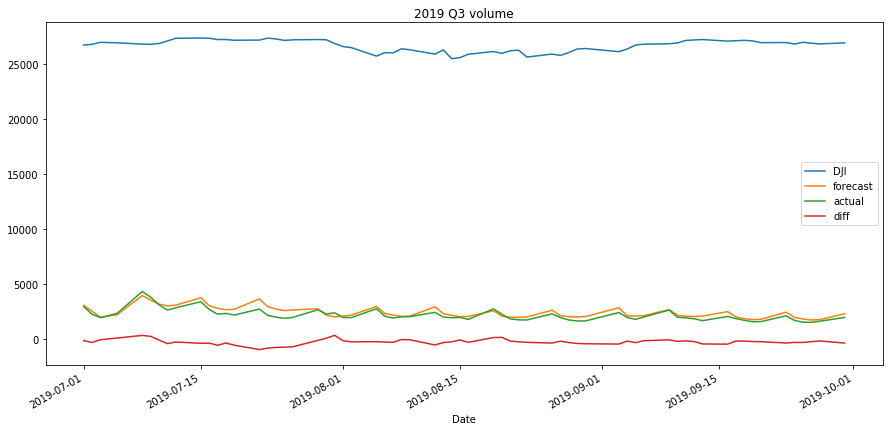

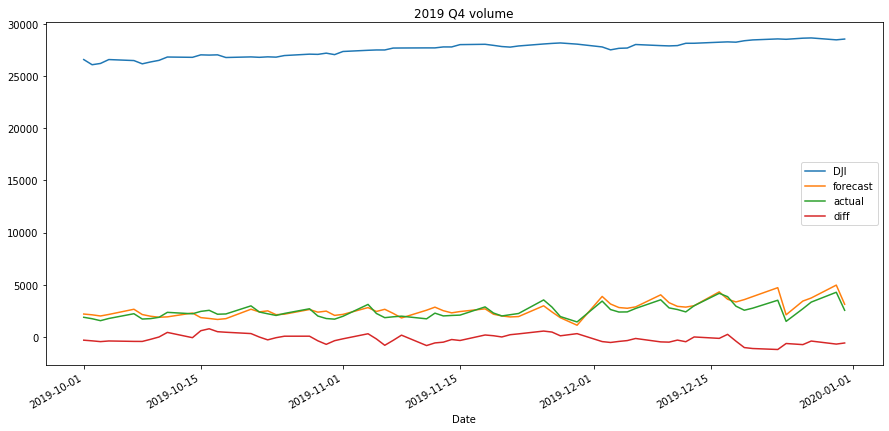

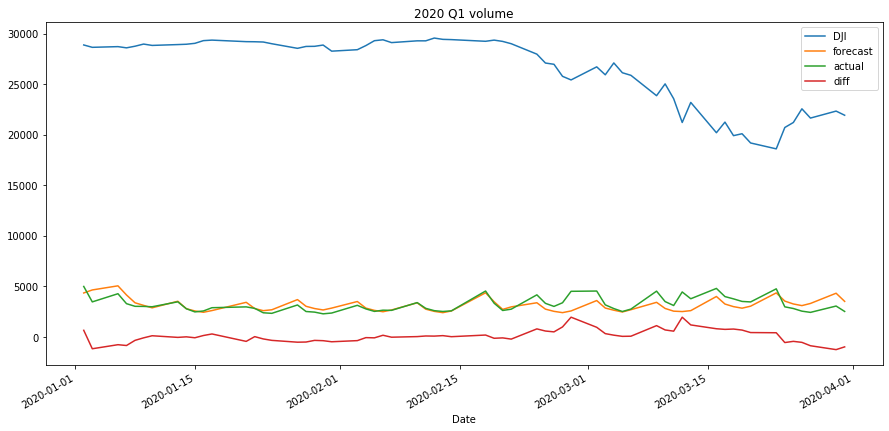

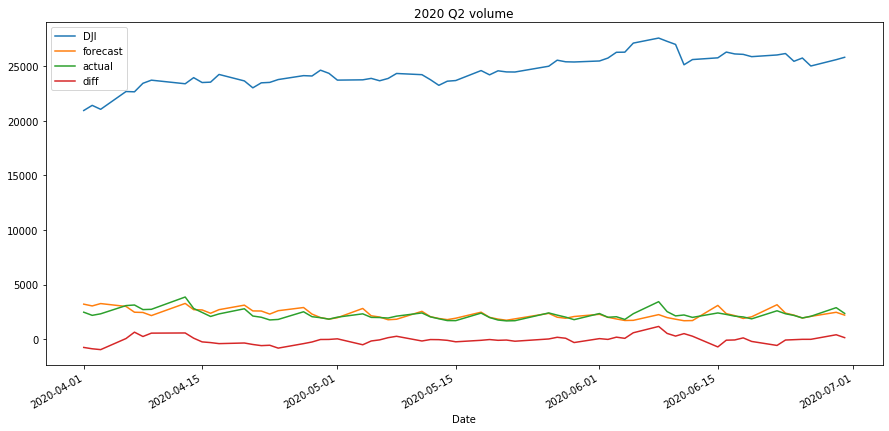

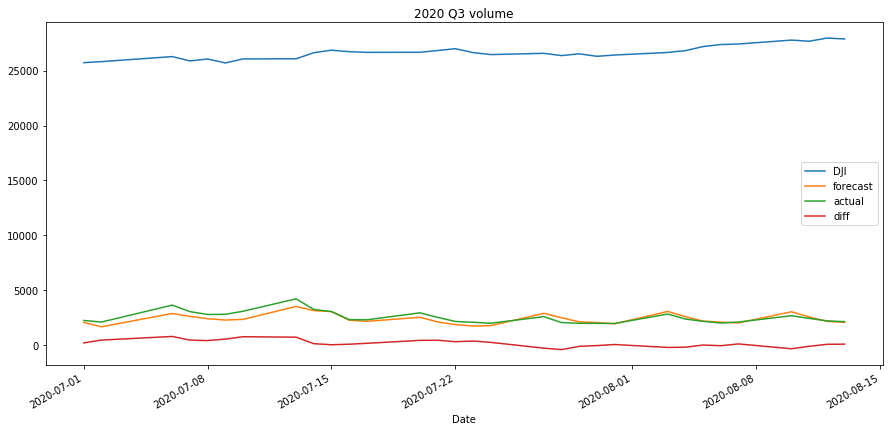

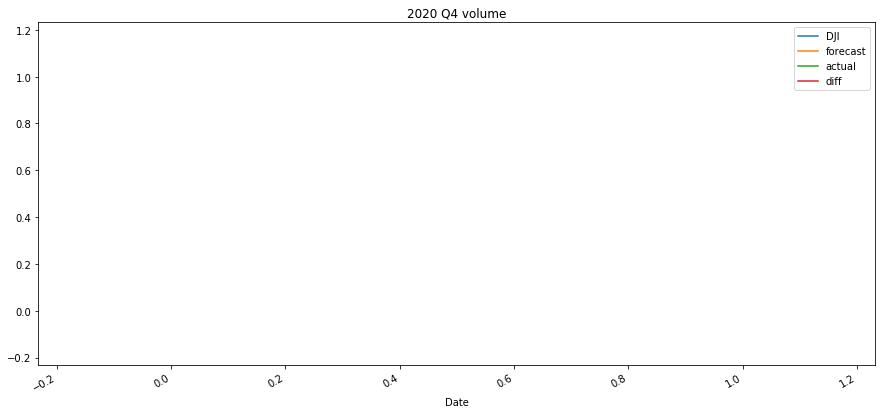

In [50]:
for y in range(2016,2021):
    for q in range(1,5):
        df[(df.index.quarter==q) & (df.index.year==y)].plot(figsize= (15,7))
        plt.title(str(y)+' Q'+str(q)+' volume')
plt.show()

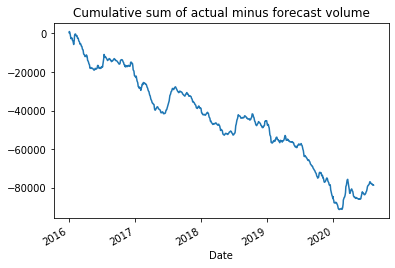

In [57]:
df['diff'].cumsum().plot()
plt.title('Cumulative sum of actual minus forecast volume')
plt.show()

In [52]:
df.groupby(df.index.quarter)['actual'].describe()

count         mean         std     min     25%     50%     75%     max
Date                                                                        
1     307.0  3341.426710  728.926149  2123.0  2824.0  3161.0  3717.0  6886.0
2     317.0  2552.596215  686.688058  1692.0  2077.0  2349.0  2852.0  5426.0
3     285.0  2561.431579  549.368767  1545.0  2186.0  2460.0  2847.0  5222.0
4     251.0  2775.533865  641.198186  1317.0  2313.0  2708.0  3207.5  4562.0

Text(0.5, 1.0, 'actual volumes by week')

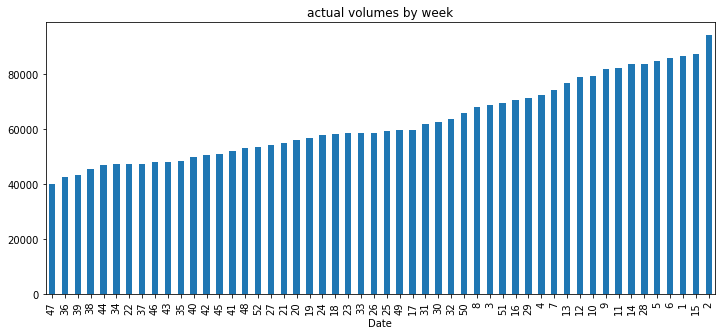

In [53]:
df.groupby(df.index.week)['actual'].sum().sort_values().plot.bar(figsize=(12,5))

plt.title('actual volumes by week')

Text(0.5, 1.0, 'actual volumes by day')

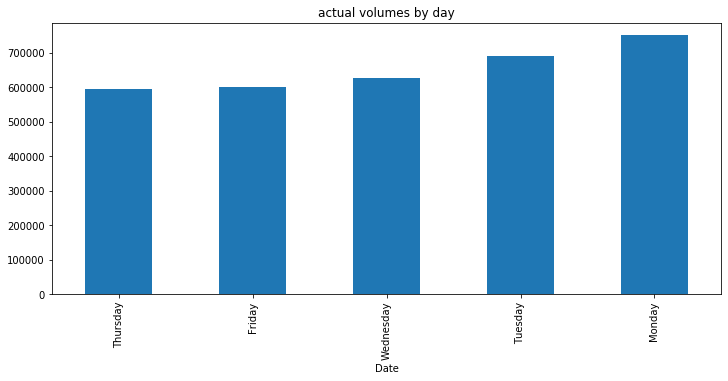

In [54]:
df.groupby(df.index.day_name())['actual'].sum().sort_values().plot.bar(figsize=(12,5))

plt.title('actual volumes by day')

Text(0.5, 1.0, 'actual volumes month')

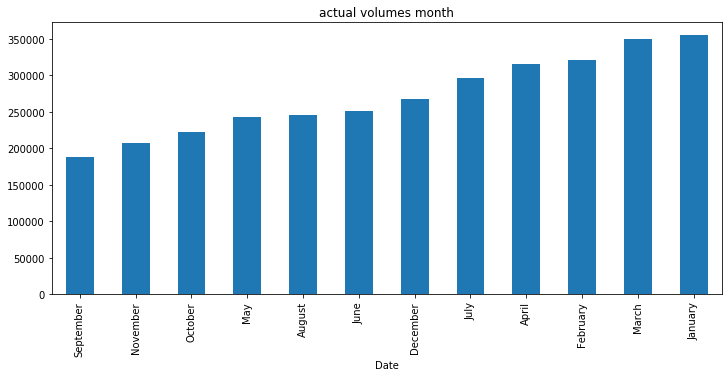

In [55]:
df.groupby(df.index.month_name())['actual'].sum().sort_values().plot.bar(figsize=(12,5))

plt.title('actual volumes month')

Text(0.5, 1.0, 'Volumes for Jan 2016')

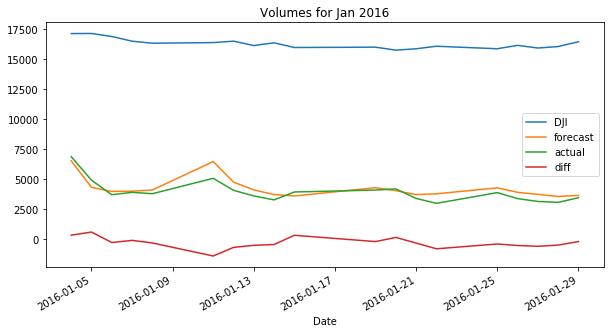

In [56]:
df[(df.index.month==1) & (df.index.month==1) & (df.index.year==2016)].plot(figsize=(10,5))
plt.title('Volumes for Jan 2016')